In [ ]:
'Matar Dieye'

In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager

import pandas as pd

In [2]:
df=pd.read_csv('/Users/vignesh.jayanth/Documents/check.csv')

In [3]:
# subset the barcelona shots
df_shots = df[(df.type == 'Shot') & (df.team == 'Gorica')].copy()

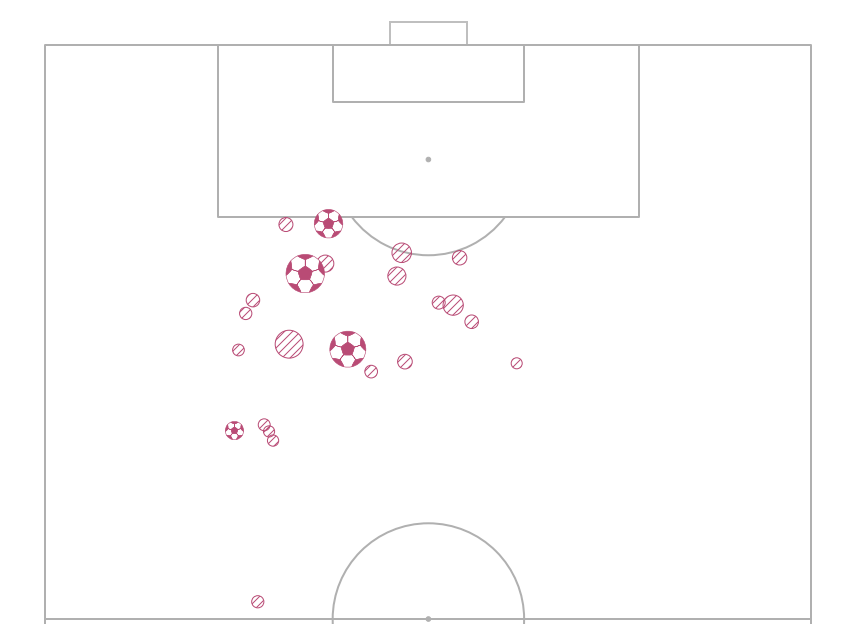

In [5]:
df_shots = df[(df.type == 'Shot') & (df.team == 'Gorica')].copy()

# filter goals / non-shot goals
df_goals = df_shots[df_shots.shot_outcome == 'Goal'].copy()
df_non_goal_shots = df_shots[df_shots.shot_outcome != 'Goal'].copy()

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

# plot non-goal shots with hatch
sc1 = pitch.scatter(df_non_goal_shots.Start_x, df_non_goal_shots.Start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_non_goal_shots.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',  # give the markers a charcoal border
                    c='None',  # no facecolor for the markers
                    hatch='///',  # the all important hatch (triple diagonal lines)
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',
                    ax=ax)

# plot goal shots with a football marker
# 'edgecolors' sets the color of the pentagons and edges, 'c' sets the color of the hexagons
sc2 = pitch.scatter(df_goals.Start_x, df_goals.Start_y,
                    # size varies between 100 and 1900 (points squared)
                    s=(df_goals.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#b94b75',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax)